# Support Vector Machine (SVN)
Support Vector Machine ist ein überwachtes Machine Learning Verfahren, überwiegend für binäre Klassifizierung benutzt.
Die Trainingsdaten werden im n-dimensionalen Raum geplottet und der Algorithmus versucht eine solche Grenze zwischen
den beiden Klassen zu finden, so dass ein möglichst breiter Bereich frei von Stichproben um die Grenze herum ensteht.

### Stützvektoren

![support vector](figures/support_vector.png)

Die Grenze ist mittels der nächstliegenden Objekte definiert, die man deswegen *Stützvektoren* nennt. Dafür sind Vektoren, 
die von der Grenze entfernt liegen, beeinflussen ihre Berechnung nicht, deswegen brauchen die auch nicht im Hauptspeicher
zu stecken. Aus dieser Grund sind SVN Speichereffizient.

### Hyperebenen
Wenn man um Grenzen spricht, Das ist ein Unterraum, dessen Dimension um 1 kleiner ist als seine Umgebung. 
Zum Beispiel im dreidimensionalen Raum, wäre eine Hyperebene eine zweidimensionale Ebene. Und im zweidimensionalen Raum wäre
eine Hyperebene einfach eine gerade Linie. 

### Kernel-Trick
Daraus folgt aber, dass die Daten linear trennbar sind, was für die meisten reellen Fälle nicht der Fall ist. 
Deswegen kann man den sogenannten *Kernel-Trick* verwenden. Die Idee dahinter ist das Vektorraum in einem höherdimensionalen 
Raum zu überführen, wobei die Objekte schon linear trennbar sind und da eine Hyperebene zu definieren. 
Bei der Rücktransformation, wird diese Hyperebene nichtlinear und oft auch nicht zusammenhängend.

Probleme sind der hohe Rechenaufwand bei der Dimensionsteigerung und die oft nicht intuitive und unbrauchbare Form der
Hyperebene nach der Dimensionsreduktion. Man kann geeignete Kernel-Funktionen benutzen, die nicht so rechenintensiv sind,
aber trotzdem die Hyperebene im hochdimensionalen Raum die Hyperebene beschreiben können.

## Implementierung mit Python
Wir nehmen den [Irisdatensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) und als Bibliotheken benutzen wir
`sklearn` und `numpy`. 



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Datensatz laden
data = load_iris()
features = np.array(data.data)
labels = np.array(data.target)

Typischerweise kann man ein SMV Konstruktur bilden mit `svm = SVC()`. `SVC` steht für *Support Vector Classificator* und im Gegensatz zu *Support Vector Regressor* wird nur für Klassifikationsprobleme verwendet. Mit `svm.fit(features, labels)` trainiert man das Modell und mit `svm.predict()` kann man die Vorhersagen für neue Stichprobe erhalten. 

Interessant bei der Implementierung von SVM sind die Kernel-funktionen und die Konstruktorparameter, die man anpassen kann. 
Wir werden diese Parameter erläutern und die Unterschiede visualisieren. Dafür brauchen wir eine neue funktion zu definieren.

In [58]:
def plot_data(X, y, kernel_fn="linear", C=1.0, degree=3, gamma='auto'):
    # 2 Grafiken nebeneinander zeigen
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11,3))
    
    for i in range(2):
        ax = [ax1, ax2][i]
        
        # 2 Mermale für die Anpassung verwenden
        svm = SVC(kernel=kernel_fn, C=C, degree=degree, gamma=gamma)
        svm.fit(X[:, 2*i:2*i+2] ,y)
        
        # Minimale und Maximale Werte aus X nehmen und ein
        # Matrix bilden mit alle Koordinaten mit Abstand 0.05
        x_min, x_max = X[:, 0 + (2 * i)].min() - 1, X[:, 0 + (2 * i)].max() + 1
        y_min, y_max = X[:, 1 + (2 * i)].min() - 1, X[:, 1 + (2 * i)].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.01))

        # Vorhersagen nehmen für alle Koordinaten
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

        # Hintergrund färben für jede Punkt aus xx,yy
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.summer)
        
        # Daten auch als Punkte plotten
        ax.scatter(X[:, 0 + (2 * i)], 
                   X[:, 1 + (2 * i)], 
                   c=y, cmap=plt.cm.summer, 
                   edgecolors='black')
        
    plt.title("Kernel Function: %s \n C: %.2f \n gamma: %s " % 
                  (kernel_fn, C, str(gamma)))

    plt.show()

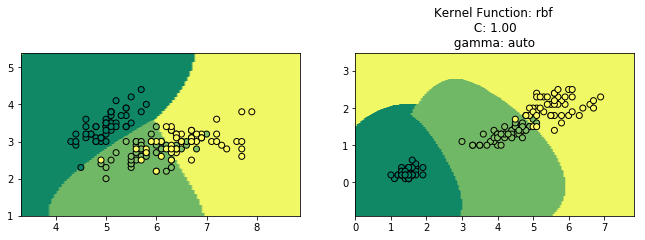

In [59]:
plot_data(features, labels, kernel_fn="rbf")

### Kernel-Funktion
Scikit-learn verfügt über einige Kernel-Funktionen, die man mit einem Zeichenkette dem Konstruktor übergibt. Die einfachste ist das lineare Kernel, das aber nur dann gut funktioniert, wenn die Daten linear trennbar sind. 

Dann gibt es noch das polynomial-Kernel, wobei man extra Merkmale erstellt, dessen Werte Kombinationen aus schon existierende Merkmale sind. Zum Beispiel ein Datensatz mit Merkmale `[x. y, z]` bekommt nach der Anwendung des linearen Kernel ein zusätzliches Mermal, und sieht so aus: `[x, y, z, x^3 + y^2 + x]`. Und vielleicht mithilfe von diser neuen Dimension, kann man schon die Daten besser klassifizieren.

Das am häufigsten verwendete Kernel ist `rbf`, den man auch als Gauss-Kernel bezeichnet. Die einfachste Beschreibung seiner Funktionalität ist zu sagen, dass man findet Cluster um die verschiedenen Klassen.

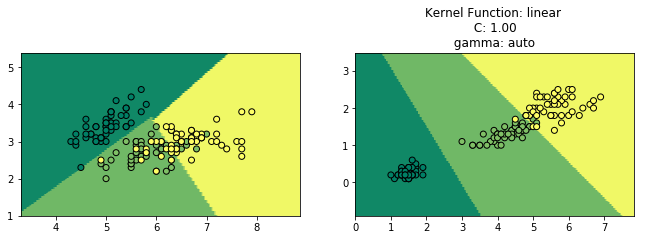

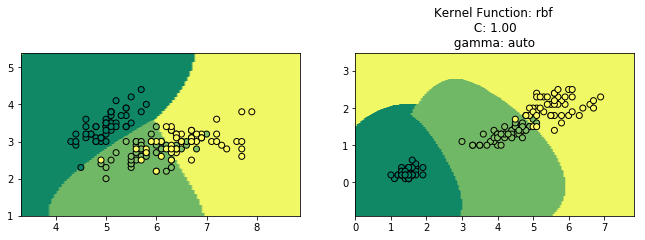

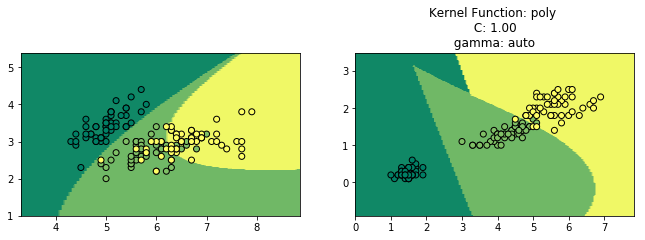

In [60]:
# hier Kernelfunktion anpassen - 'linear', 'poly' and 'rbf'
plot_data(features, labels, kernel_fn="linear")
plot_data(features, labels, kernel_fn="rbf")
plot_data(features, labels, kernel_fn="poly")

### Gamma

Der `gamma` Parameter verwendet man für nichtlineare SVM und bestimmt wie 'weit' der Einfluss jeder einzelnen Stichprobe reicht. Mit einem kleineren Gamma sieht das Modell wie ein SVM mit linearem Kernel, weil man nicht gut seine Komplexität bezeichnen kann. Ein großer Gamma Wert bedeutet, dass die Stützvektoren beschreiben nur sich selbst und dadurch entsteht auch starke Überanpassung.

Falls `'auto'` als Gamma Parameter eingegeben wird, dann wird das Gamma als `1/n_merkmale`.

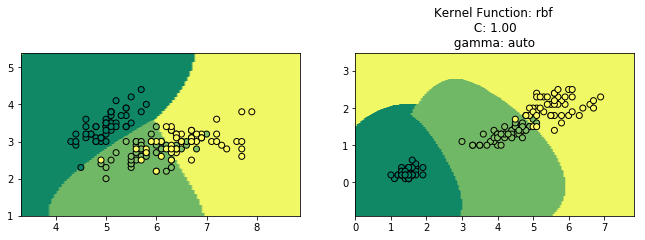

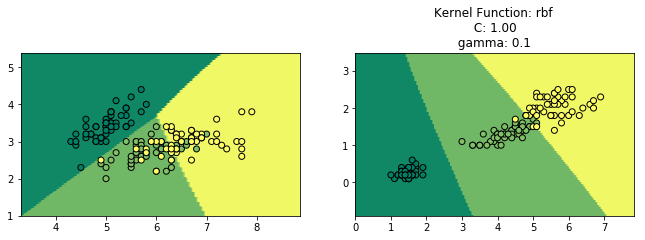

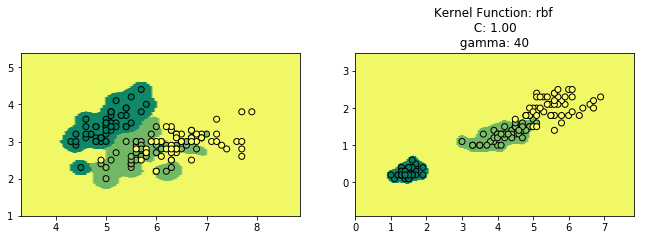

In [64]:
plot_data(features, labels, kernel_fn="rbf", gamma='auto')
plot_data(features, labels, kernel_fn="rbf", gamma=0.1)
plot_data(features, labels, kernel_fn="rbf", gamma=40)

### Strafparameter (C)

Der C Parameter ist die Kost der Klassifizierung und wie groß ist die Strafe wenn eine Stichprobe falsch klassifiziert wird. Durch einen großen C Wert, wird das Modell stark für jede falsche Klassifizierung bestraft. Dadurch entstehen komplexere Modelle, aber auch eine größere Überanpassungsefahr. Ein kleines C liefert eine glattere Entscheidungsebene, deswegen aber werden Ausreßer falsch klassifiziert.

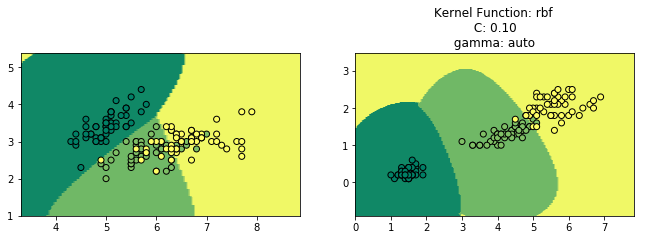

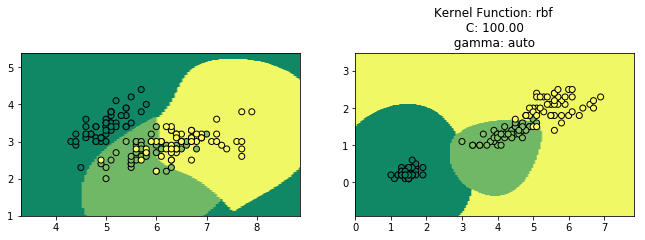

In [65]:
plot_data(features, labels, kernel_fn="rbf", C=0.1)
plot_data(features, labels, kernel_fn="rbf", C=100)

## Vor- und Nachteile
### Vorteile
- effektiv in hochdimensionalen Vektorräumen
- effektiv auch wenn man mehr Merkmale als Stichproben hat
- Speichereffizient - man braucht nur die Stützvektoren im Speicher

### Nachteile
- nicht effizient für große Datensätze, weil Trainingszeit so länger ist
- nicht effektiv wenn Klassen überlappen
- liefert keine Wahrscheinlichkeitsschätzungen

## Ressourcen
- Git Repository mit dem kompletten Code - [Link](https://github.com/emomicrowave/machine-learning-tutorials/tree/master/05-support_vector_machines)
- Logistische Regression vs. Decision Trees vs. Support Vector Machines - [Link](https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/)